In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('admission_predict.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


# Exploring the Dataset

In [3]:
df.shape

(500, 9)

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [6]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [9]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [10]:
df.isnull().any()

Serial No.           False
GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

In [11]:
df = df.rename(columns={
    'GRE Score': 'GRE',
    'TOEFL Score': 'TOEFL',
    'LOR ': 'LOR',
    'Chance of Admit ': 'Probability'  # <-- Important: trailing space in original column name
})
df_copy = df.copy(deep=True)  # Make the copy after renaming


# Data Visualization

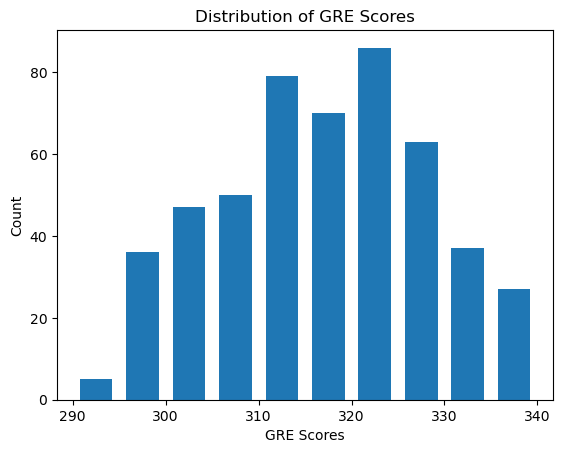

In [12]:
fig = plt.hist(df['GRE'], rwidth = 0.7)
plt.title("Distribution of GRE Scores")
plt.xlabel('GRE Scores')
plt.ylabel('Count')
plt.show()

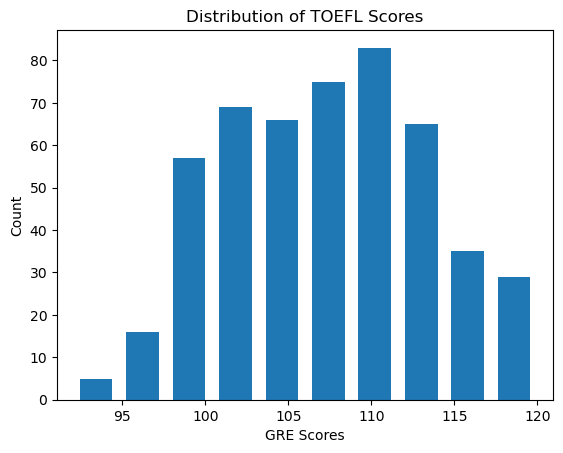

In [13]:
fig = plt.hist(df['TOEFL'], rwidth = 0.7)
plt.title("Distribution of TOEFL Scores")
plt.xlabel('GRE Scores')
plt.ylabel('Count')
plt.show()

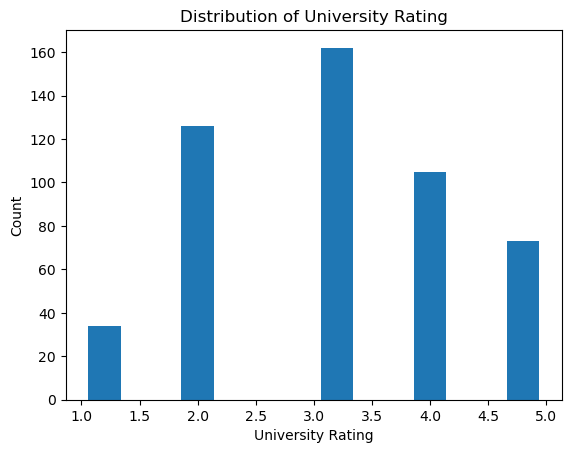

In [14]:
fig = plt.hist(df['University Rating'], rwidth = 0.7)
plt.title("Distribution of University Rating")
plt.xlabel('University Rating')
plt.ylabel('Count')
plt.show()

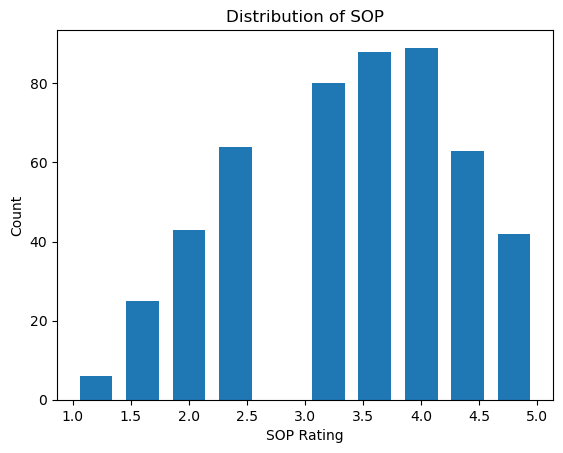

In [15]:
fig = plt.hist(df['SOP'], rwidth = 0.7)
plt.title("Distribution of SOP")
plt.xlabel('SOP Rating')
plt.ylabel('Count')
plt.show()

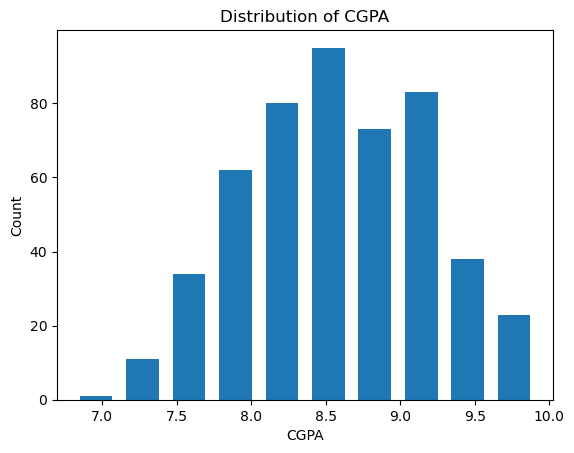

In [16]:
fig = plt.hist(df['CGPA'], rwidth = 0.7)
plt.title("Distribution of CGPA")
plt.xlabel('CGPA')
plt.ylabel('Count')
plt.show()

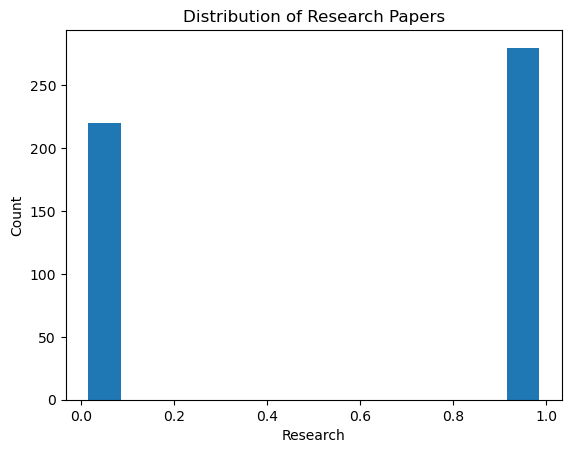

In [17]:
fig = plt.hist(df['Research'], rwidth = 0.7)
plt.title("Distribution of Research Papers")
plt.xlabel('Research')
plt.ylabel('Count')
plt.show()

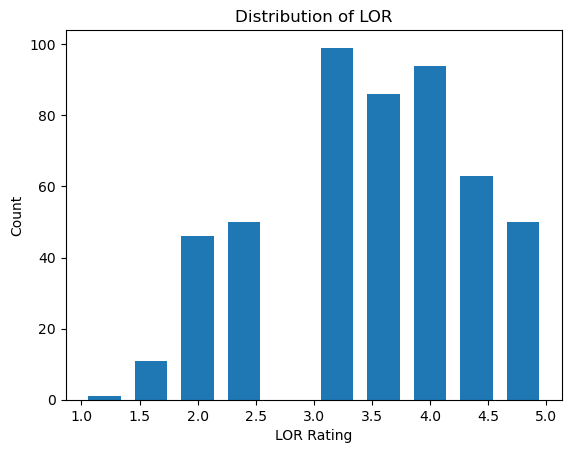

In [18]:
fig = plt.hist(df['LOR'], rwidth = 0.7)
plt.title("Distribution of LOR")
plt.xlabel('LOR Rating')
plt.ylabel('Count')
plt.show()

# Data Cleaning

In [19]:
#df.drop('Serial No.', axis = 'columns',  inplace = True)
df.head()

,Serial No.,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Probability
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [20]:
#Replacing the 0 values from ['GRE', 'TOEFL', 'University Rating', 'SOP', 'CGPA'} by Nan
df_copy = df.copy(deep=True)
df_copy[['GRE', 'TOEFL', 'University Rating', 'SOP', 'LOR', 'CGPA']] = df_copy[['GRE', 'TOEFL', 'University Rating', 'SOP', 'LOR', 'CGPA']].replace(0, np.NaN)
df_copy.isnull().sum()

Serial No.           0
GRE                  0
TOEFL                0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Probability          0
dtype: int64

# Model Buidling

In [21]:
# #Splitting the dataset in features and label
X = df_copy.drop('Probability', axis=1)
y = df_copy['Probability']
#print(df_copy.columns.tolist())


In [22]:
# Drop unnecessary columns
df_copy = df_copy.drop(columns=['Serial No.'], errors='ignore')

# Split into features and label
X = df_copy.drop('Probability', axis=1)
y = df_copy['Probability']


In [23]:
#Using GridSearchCV to find the test algorithm for this problem
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [24]:
#Creating a function to calculate best model for this problem
def find_best_model(X, y):
    models = {
        'linear_regression': {
            'model' : LinearRegression(),
            'parameters' : {
               # 'normalize' : [True, False]
            }
        },

        'lasso': {
            'model' : Lasso(),
            'parameters' : {
                'alpha' : [1, 2],
                'selection' : ['random', 'cyclic']
            }
        },
        'svr' : {
            'model' : SVR(),
            'parameters' : {
                'gamma' : ['auto', 'scale']
            }
        },
        'decision_tree' : {
            'model' : DecisionTreeRegressor(),
            'parameters' : {
                'criterion' : ['squared_error', 'friedman_mse'],
                'splitter' : ['best', 'random']
            }
        },
        'random_forest' : {
          'model' : RandomForestRegressor(criterion='squared_error'),
            'parameters' : {
                'n_estimators': [5, 10, 15, 20]
            }
        },
        'knn' : {
            'model' : KNeighborsRegressor(algorithm='auto'),
            'parameters': {
                'n_neighbors': [2, 5, 10, 20]
            }
        }
    }
    scores = []
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'],cv=5, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model' : model_name,
            'best_parameters': gs.best_params_,
            'score' : gs.best_score_
        })
    return pd.DataFrame(scores, columns=['model', 'best_parameters', 'score'])

find_best_model(X, y)

,model,best_parameters,score
0,linear_regression,{},0.810802
1,lasso,"{'alpha': 1, 'selection': 'random'}",0.215088
2,svr,{'gamma': 'scale'},0.654099
3,decision_tree,"{'criterion': 'squared_error', 'splitter': 'ra...",0.561840
4,random_forest,{'n_estimators': 15},0.778272
5,knn,{'n_neighbors': 20},0.723017


**Since the linear regression algorithm has the highest accuracy, the model selected for this problem is Linear Regression**

In [25]:
#Using cross_val_score for gaining highest accuracy
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LinearRegression(), X, y, cv=5)
print('Highest Accuracy : {}%'.format(round(sum(scores)*100/len(scores)), 3))
#print(format(round(sum(scores)*100/len(scores)), 3))

Highest Accuracy : 81%


In [26]:
#Splitting the dataset into train test samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 5)
print(len(X_train), len(X_test))

400 100


In [27]:
print(df_copy.columns)


Index(['GRE', 'TOEFL', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research',
       'Probability'],
      dtype='object')


In [28]:
#Creating Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8214787365889662

In [29]:
#Prediction 1
#Input in the form : GRE, TOEFL, University Rating, SOP, LOR, CGPA, Research
print('Chance of getting into UCLA is {}%'.format(round(model.predict([[337, 118, 4, 4.5, 4.5, 9.65, 1]])[0]*100, 3)))

Chance of getting into UCLA is 95.227%


C:\Users\Welcome\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [30]:
pred = model.predict([[337, 118, 4, 4.5, 4.5, 9.65, 0]])[0]
pred = max(0, min(pred, 1))  # clip between 0 and 1
print('Chance of getting into UCLA is {}%'.format(round(pred * 100, 3)))


Chance of getting into UCLA is 92.855%


C:\Users\Welcome\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
